**Problem Statement**

Prepare a classification model using SVM for salary data 

**Data Description:**

age -- age of a person

workclass	-- A work class is a grouping of work 

Education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [31]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (1).csv


In [32]:
salary_train=pd.read_csv("SalaryData_Train(1).csv")
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [34]:
salary_test=pd.read_csv("SalaryData_Test(1).csv")
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Join the training & test data to perform EDA.

In [35]:
salary=salary_train.append(salary_test)
salary.reset_index(inplace=True)
salary=salary.drop(['index'],axis=1) 
salary.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
45220,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [36]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [37]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [38]:
salary.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [39]:
#Numeric Features
numeric_features=[feature for feature in salary.columns if salary[feature].dtypes !='O']
print('Numeric Features:',numeric_features,'\n')

Numeric Features: ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'] 



In [40]:
#Discrete & continuous features within numeric features
discrete_features=[feature for feature in numeric_features if len(salary[feature].unique())<25]
print('Discrete Features:',discrete_features,'\n')

continuous_features=[feature for feature in numeric_features if feature not in discrete_features]
print('Continuous Features:',continuous_features,'\n')

Discrete Features: ['educationno'] 

Continuous Features: ['age', 'capitalgain', 'capitalloss', 'hoursperweek'] 



In [41]:
#Categorical Features
categorical_features=[feature for feature in salary.columns if salary[feature].dtypes =='O']
print('Categorical Features:',categorical_features)

Categorical Features: ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [42]:
#Value count's frequency in categorical features
for feature in categorical_features:
    print(salary[feature].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [43]:
#Labels in categorical features
for feature in categorical_features:
    print(feature,'has',len(salary[feature].unique()),'labels.')

workclass has 7 labels.
education has 16 labels.
maritalstatus has 7 labels.
occupation has 14 labels.
relationship has 6 labels.
race has 5 labels.
sex has 2 labels.
native has 40 labels.
Salary has 2 labels.


**EDA**

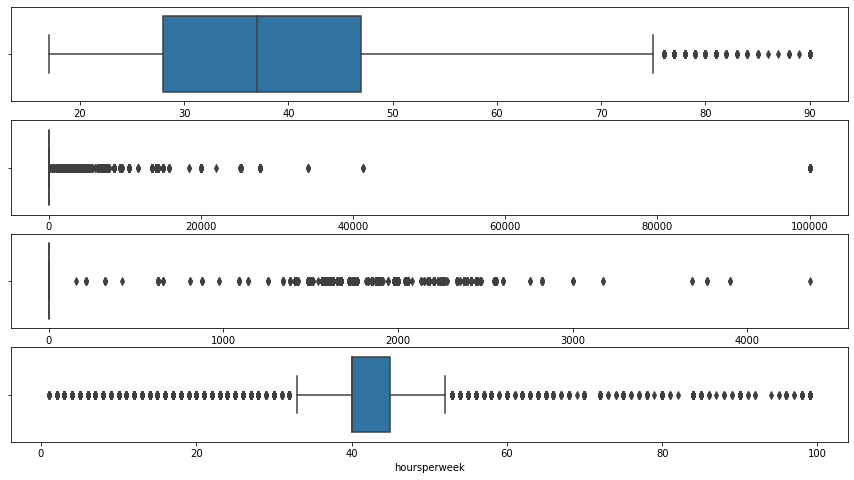

In [44]:
#Boxplot for continuous features
fig, axes=plt.subplots(4,1,figsize=(15,8))

sns.boxplot(salary.age,ax=axes[0])
sns.boxplot(salary.capitalgain,data=salary,ax=axes[1])
sns.boxplot(salary.capitalloss,ax=axes[2])
sns.boxplot(salary.hoursperweek,ax=axes[3])

Outliers are present in very large no. of quantity. But because of this we cannot drop the outliers because they are unique and helps in model building.

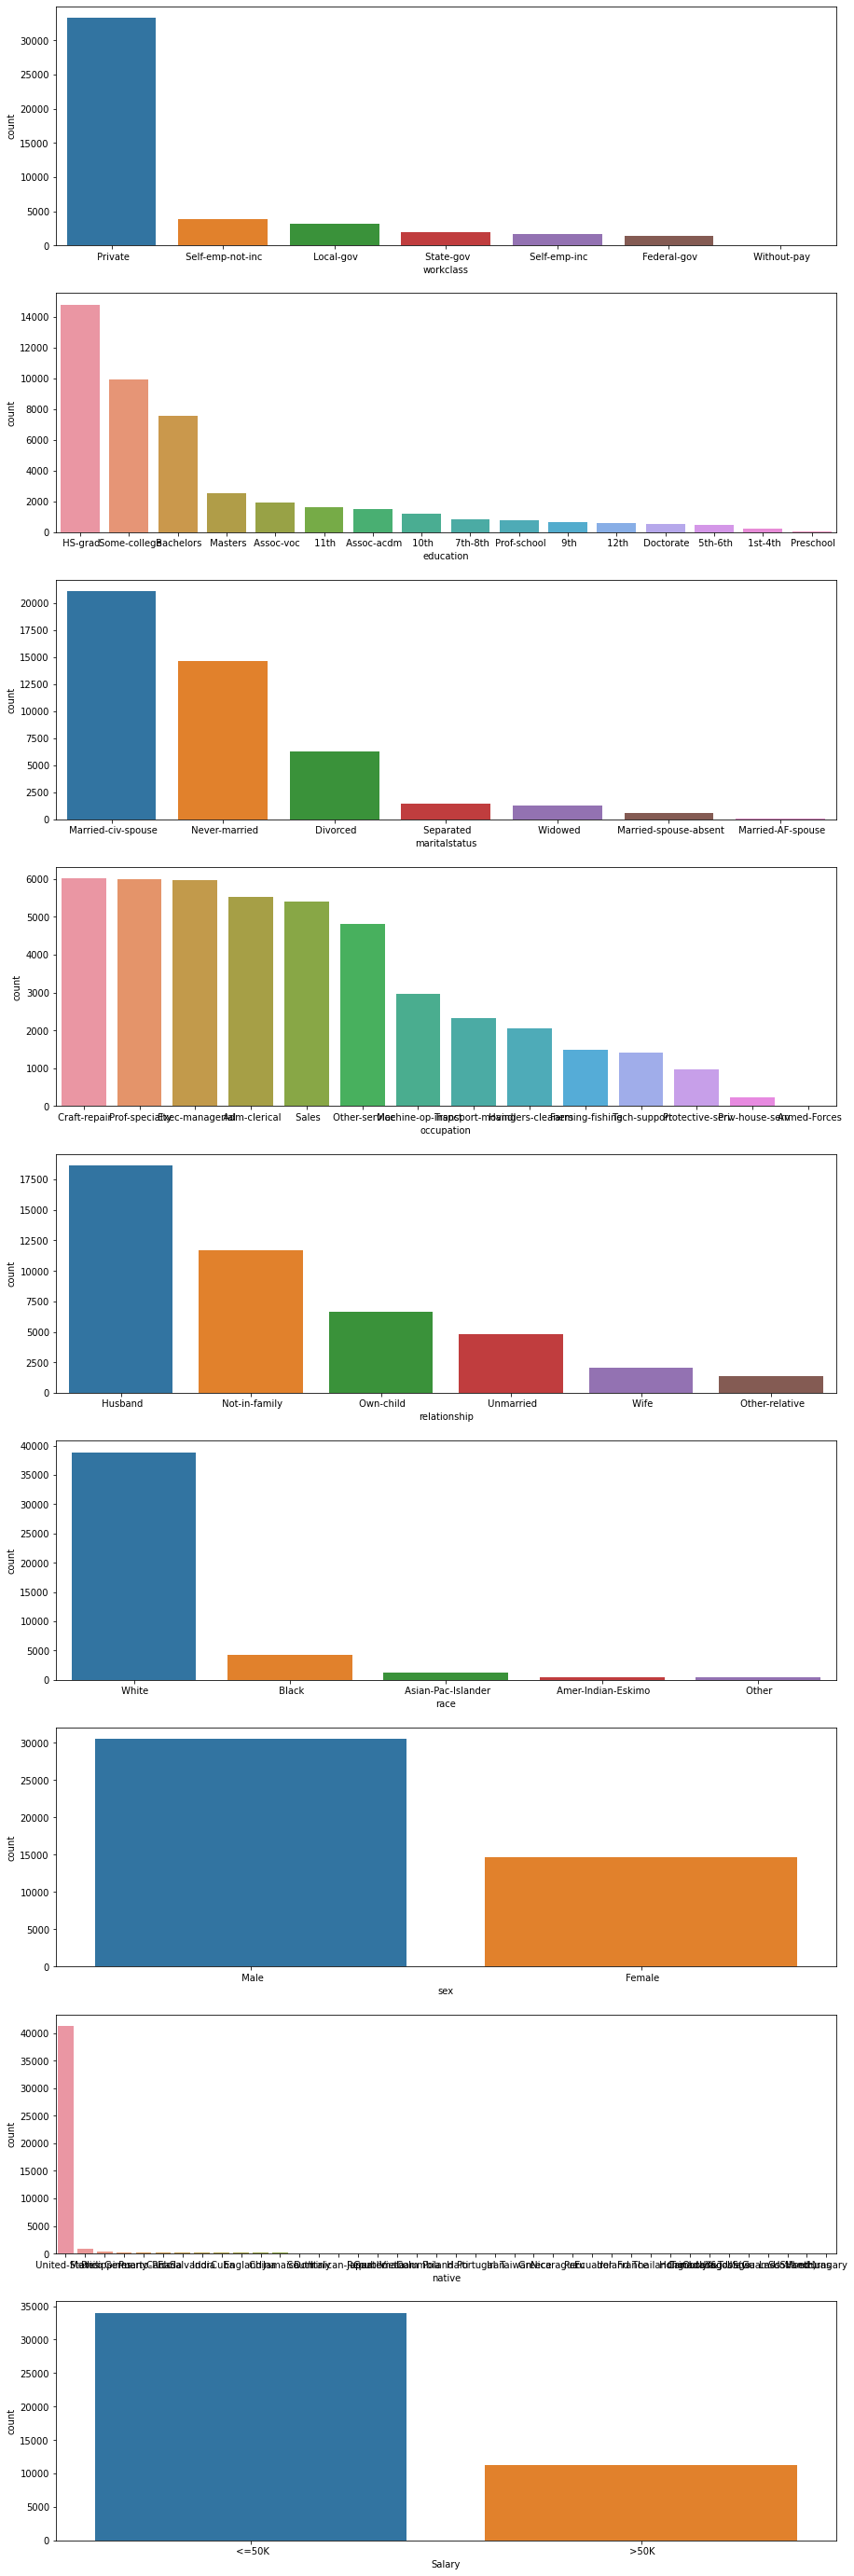

In [45]:
#Barplot for categorical features
fig,axes=plt.subplots(len(categorical_features),1,figsize=(15,50))

for i in range (0,len(categorical_features)):
    sns.countplot(salary[categorical_features[i]],ax=axes[i],order=salary[categorical_features[i]].value_counts().index)

**Univariate Analysis**

In [47]:
salary.shape

(45221, 14)

In [48]:
salary1=salary.copy()
salary1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
salary1.drop("Salary",axis=1,inplace=True)
salary1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [50]:
#Encoding categorical input
salary1=pd.get_dummies(salary1)
salary1.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
salary1["Salary"]=salary.Salary
salary1.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [72]:
#Encoding categorical output column
encoder=LabelEncoder()
encoder.fit(salary1.Salary)

LabelEncoder()

In [53]:
salary1.Salary=encoder.transform(salary1.Salary)
salary1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


**Train Test Split**

In [54]:
salary_train.shape

(30161, 14)

In [55]:
salary_test.shape

(15060, 14)

Seperating training & test data for further analysis.

In [56]:
train_set=salary1.iloc[:30161,:]
test_set=salary1.iloc[30161:,:]

In [57]:
print("Shape of new dataframe: {},{}".format(train_set.shape,test_set.shape))

Shape of new dataframe: (30161, 103),(15060, 103)


In [58]:
train_set

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
x_train=train_set.iloc[:,:102]
x_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
y_train=train_set.loc[:,["Salary"]]
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [63]:
test_set

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
30161,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30162,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30163,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
30164,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
30165,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
x_test=test_set.iloc[:,:102]
x_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
30161,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30162,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30163,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30164,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30165,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
y_test=test_set.loc[:,["Salary"]]
y_test

,Salary
30161,0
30162,0
30163,1
30164,1
30165,0
...,...
45216,0
45217,0
45218,0
45219,0


In [66]:
print("Shape of X_train:",x_train.shape)
print("Shape of X_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (30161, 102)
Shape of X_test: (15060, 102)
Shape of y_train: (30161, 1)
Shape of y_test: (15060, 1)


**SVM with default hyperparameters**

In [67]:
classifier=SVC()
classifier.fit(x_train,y_train)

pred=classifier.predict(x_test)

accuracy_score(y_test,pred)

0.7964143426294821

In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



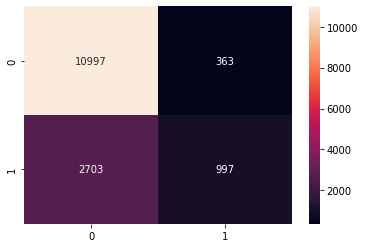

In [70]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d');